In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math


In [144]:
## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


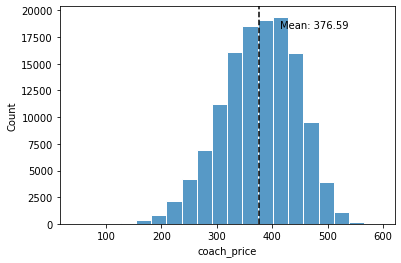

In [11]:
## Task 1 What do coach ticket prices look like? 
sns.histplot(flight.coach_price, bins = 20, edgecolor = 'white')
plt.axvline(flight.coach_price.mean(), color='k', linestyle='dashed', linewidth=1.5)
min_ylim, max_ylim = plt.ylim()
plt.text(flight.coach_price.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(flight.coach_price.mean()))
plt.show()

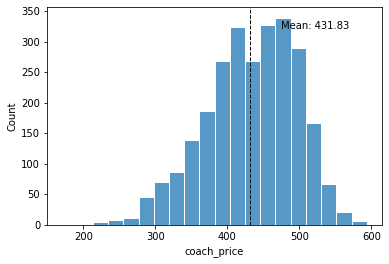

In [13]:
## Task 2 visualize the coach ticket prices for flights that are 8 hours long
df8 = flight[flight.hours == 8]
sns.histplot(df8.coach_price, bins = 20, edgecolor = 'white')
plt.axvline(df8.coach_price.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.coach_price.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df8.coach_price.mean()))
plt.show()

[   0    9   12    5   13    6   11   10    8   17   14    7    3   16
   15    4    2   18   40   20   32   31   26   21   37   27   24   29
   28   19   22   33   43   34   23   30   35   44   38   39   25   42
   45   36   47   41   46    1   50   48   51   49   54   53   58   52
 1515 1484 1498 1519 1446 1506 1473 1509 1560 1488 1512 1503 1500 1496
 1476 1536 1524 1497 1468 1532 1479 1489 1493 1495 1518 1525 1513 1522
 1494 1504 1462 1510 1492 1501 1499 1521 1508 1480 1482 1472 1491 1514
 1507 1459 1467 1528 1469 1475 1533 1477 1483 1487 1530 1481 1490]


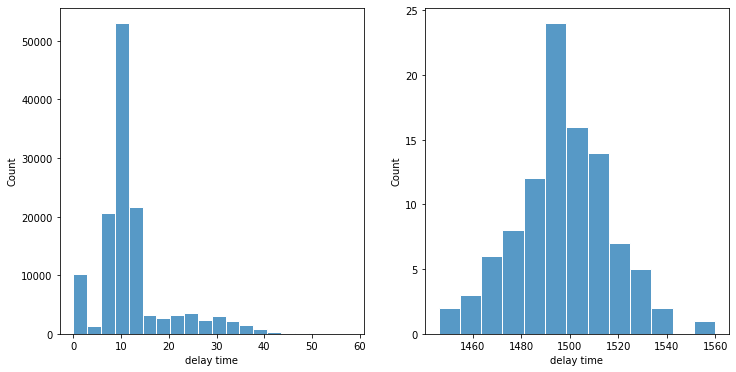

In [42]:
## Task 3 How are flight delay times distributed?
shortdelay = flight[flight.delay < 100]
longdelay = flight[flight.delay > 100]
fig, ax = plt.subplots(1,2,figsize = (12,6))
sns.histplot(shortdelay.delay, edgecolor = 'white',bins = 20, ax = ax[0])
sns.histplot(longdelay.delay, edgecolor = 'white', ax = ax[1])
ax[0].set_xlabel('delay time')
ax[1].set_xlabel('delay time')
print(flight.delay.unique())

<AxesSubplot:xlabel='miles', ylabel='coach_price'>

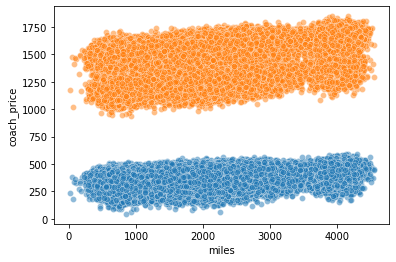

In [49]:
sns.scatterplot(x= flight.miles, y = flight.coach_price, alpha = 0.5)
sns.scatterplot(x= flight.miles, y = flight.firstclass_price, alpha = 0.5)

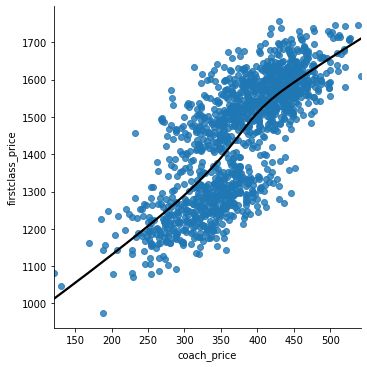

<Figure size 432x288 with 0 Axes>

In [55]:
## Task 4 the relationship between coach and first-class prices
perc = 0.01
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

<AxesSubplot:xlabel='coach_price', ylabel='Count'>

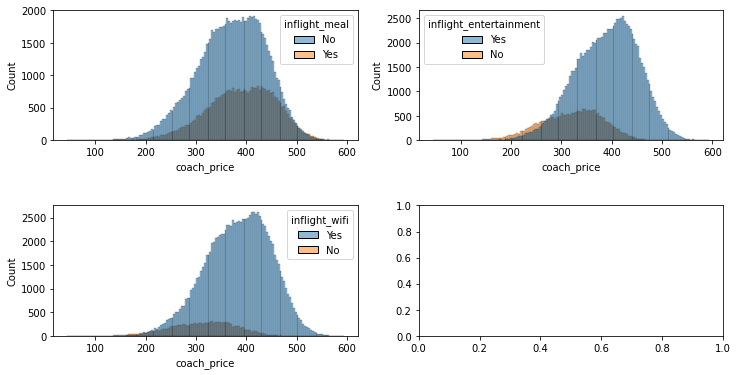

In [80]:
## Task 5 What is the relationship between coach prices and inflight features— inflight meal, inflight entertainment, and inflight WiFi? 
# Which features are associated with the highest increase in price?
fig, ax = plt.subplots(2,2,figsize = (12,6))
plt.subplots_adjust(hspace = 0.5)
sns.histplot(flight, x = "coach_price",hue = flight.inflight_meal, ax = ax[0,0])
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment,ax = ax[0,1])
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi,ax = ax[1,0])


<AxesSubplot:xlabel='inflight_wifi', ylabel='coach_price'>

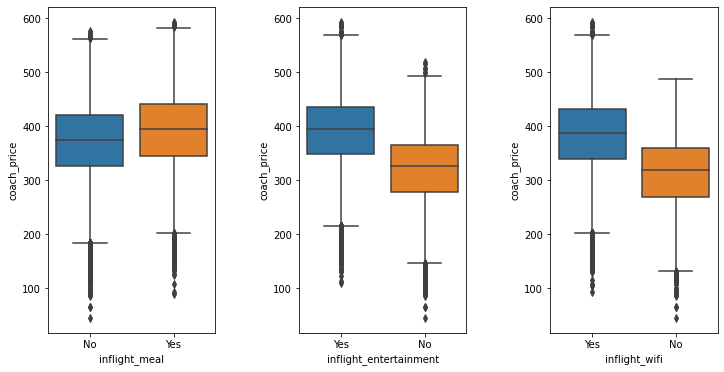

In [89]:
fig, ax = plt.subplots(1,3,figsize = (12,6))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(data = flight, x = 'inflight_meal', y = 'coach_price',ax = ax[0])
sns.boxplot(data = flight, x = 'inflight_entertainment', y = 'coach_price',ax = ax[1])
sns.boxplot(data = flight, x = 'inflight_wifi', y = 'coach_price',ax = ax[2])

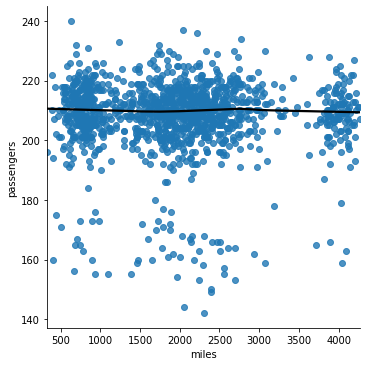

In [151]:
# #6 How does the number of passengers change in relation to the length of flights?
perc = 0.01
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
sns.lmplot(x = "miles", y = "passengers", data = flight_sub, line_kws={'color': 'black'}, lowess=True)

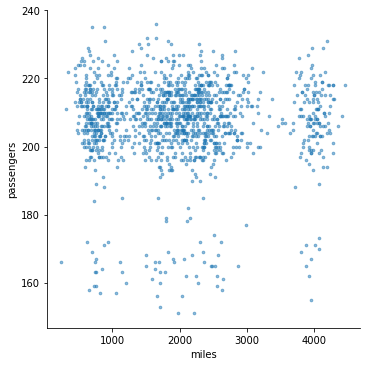

<Figure size 432x288 with 0 Axes>

In [105]:
sns.lmplot(x = "miles", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 7, "alpha":0.5}, fit_reg = False)
plt.show()
plt.clf()

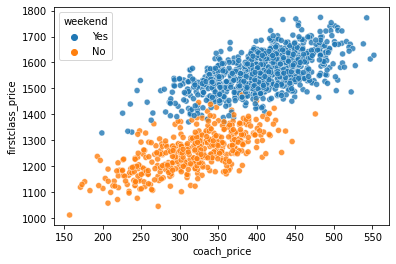

<Figure size 432x288 with 0 Axes>

In [149]:
## Task 7 Visualize the relationship between coach and first-class prices on weekends compared to weekdays.
sns.scatterplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = flight_sub, alpha=0.8)
plt.show()
plt.clf()

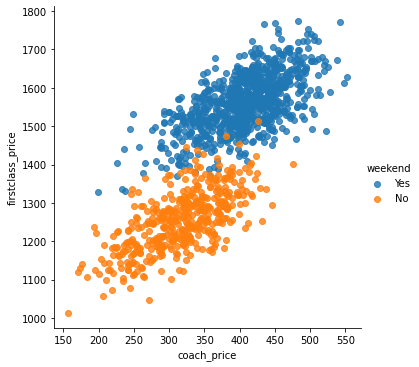

<Figure size 432x288 with 0 Axes>

In [111]:
sns.lmplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = flight_sub, fit_reg= False)
plt.show()
plt.clf()

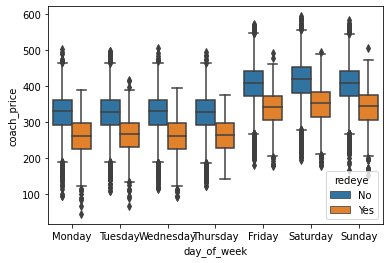

<Figure size 432x288 with 0 Axes>

In [148]:
##8 How do coach prices differ for redeyes and non-redeyes on each day of the week?
flight = flight.sort_values('day_of_week')
flight.day_of_week = pd.Categorical(flight.day_of_week,['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered = True)
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()
plt.clf()